<h1> Семинар 8. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

import warnings
warnings.filterwarnings('ignore')

<h4> Задание 1

Нам дана функция $f(x) = x^2 \cos{x}$ на отрезке $x\in [-\pi, \pi]$. Решите задачу интерполяции с помощью полиномов Лагранжа и Ньютона степени $m$ with $m=1, 2, 3, 4, 5$. Постройте график полученного полинома вместе с исходной функцией.

3.1 Построить интерполяционный многочлен в форме Ньютона и с помощью него определить f в точках $x=0, \pi/2, \pi$. Построить график на отрезке $x\in [-\pi, \pi]$.

3.2 Построить интерполяционный многочлен в форме Лагранжа и с помощью него определить f в точках $x=0, \pi/2, \pi$. Построить график на отрезке $x\in [-\pi, \pi]$.

3.3 Оценить погрешность метода при вычислении значения в точках с помощью полиномов Лагранжа и Ньютона (сравнить с точным значением функции).

3.4 Какие другие методы интерполяции Вы можете предложить?

3.5 Воспользоваться scipy.interpolate.interp1d для интерполяции значений функции. Сравнить с точностью интерполяции в п. 3.1 и 3.2.

**3.1**

In [33]:
def func(x):
    res = x * x * np.cos(x)
    return res

In [34]:
x = np.random.uniform(-np.pi, np.pi, 6)
f = func(x)

In [35]:
x = np.array(x)
f = np.array(f)
n = x.shape[0]

# разделенная разность первого порядка
f1 = np.zeros(n-1)

for i in range(n-1):
    f1[i] = (f[i+1] - f[i])/(x[i+1] - x[i])
    
f2 = np.zeros(n-2)

for i in range(n-2):
    f2[i] = (f1[i+1] - f1[i])/(x[i+2] - x[i])
    
f3 = np.zeros(n-3)

for i in range(n-3):
    f3[i] = (f2[i+1] - f2[i])/(x[i+3] - x[i])
    
f4 = np.zeros(n-4)

for i in range(n-4):
    f4[i] = (f3[i+1] - f3[i])/(x[i+4] - x[i])
    
f5 = np.zeros(n-5)

for i in range(n-5):
    f5[i] = (f4[i+1] - f4[i])/(x[i+5] - x[i])
    

In [36]:
def newton_p5(xx):
    res = f[0] + f1[0] * (xx - x[0]) + f2[0] * (xx - x[0]) * (xx - x[1]) +  f3[0] * (xx - x[0]) * (xx - x[1]) * (xx - x[2]) + f4[0] * (xx - x[0]) * (xx - x[1]) * (xx - x[2]) * (xx - x[3]) + f5[0] * (xx - x[0]) * (xx - x[1]) * (xx - x[2]) * (xx - x[3]) * (xx - x[4])
    return res

def newton_p4(xx):
    res = f[0] + f1[0] * (xx - x[0]) + f2[0] * (xx - x[0]) * (xx - x[1]) +  f3[0] * (xx - x[0]) * (xx - x[1]) * (xx - x[2]) + f4[0] * (xx - x[0]) * (xx - x[1]) * (xx - x[2]) * (xx - x[3])
    return res

def newton_p3(xx):
    res = f[0] + f1[0] * (xx - x[0]) + f2[0] * (xx - x[0]) * (xx - x[1]) +  f3[0] * (xx - x[0]) * (xx - x[1]) * (xx - x[2])
    return res

def newton_p2(xx):
    res = f[0] + f1[0] * (xx - x[0]) + f2[0] * (xx - x[0]) * (xx - x[1])
    return res

def newton_p1(xx):
    res = f[0] + f1[0] * (xx - x[0])
    return res

In [37]:
grid = np.linspace(-np.pi, np.pi, 100)
newt1 = np.zeros(100)
newt2 = np.zeros(100)
newt3 = np.zeros(100)
newt4 = np.zeros(100)
newt5 = np.zeros(100)

for m in range(1, 6):
    x_curr = x[0:m+1]
    print("m = ", m)
    if (m==1):
        newt1 = newton_p1(grid)
        print("Значение в точке 0 равно: ", newton_p1(0))        
        print("Значение в точке pi/2 равно: ", newton_p1(np.pi / 2))
        print("Значение в точке pi равно: ", newton_p1(np.pi))
        
    if (m==2):
        newt2 = newton_p2(grid)
        print("Значение в точке 0 равно: ", newton_p2(0))        
        print("Значение в точке pi/2 равно: ", newton_p2(np.pi / 2))
        print("Значение в точке pi равно: ", newton_p2(np.pi))
        
    if (m==3):
        newt3 = newton_p3(grid)
        print("Значение в точке 0 равно: ", newton_p3(0))        
        print("Значение в точке pi/2 равно: ", newton_p3(np.pi / 2))
        print("Значение в точке pi равно: ", newton_p3(np.pi))
        
    if (m==4):
        newt4 = newton_p4(grid)
        print("Значение в точке 0 равно: ", newton_p4(0))        
        print("Значение в точке pi/2 равно: ", newton_p4(np.pi / 2))
        print("Значение в точке pi равно: ", newton_p4(np.pi))
        
    if (m==5):
        newt5 = newton_p5(grid)
        print("Значение в точке 0 равно: ", newton_p5(0))        
        print("Значение в точке pi/2 равно: ", newton_p5(np.pi / 2))
        print("Значение в точке pi равно: ", newton_p5(np.pi))

m =  1
Значение в точке 0 равно:  -1.1080899741687618
Значение в точке pi/2 равно:  2.8760790865950008
Значение в точке pi равно:  6.860248147358764
m =  2
Значение в точке 0 равно:  0.9867633864274725
Значение в точке pi/2 равно:  -3.3588314810838775
Значение в точке pi равно:  -14.251594138993003
m =  3
Значение в точке 0 равно:  0.15651300061991702
Значение в точке pi/2 равно:  3.3757773753566487
Значение в точке pi равно:  22.98888922278616
m =  4
Значение в точке 0 равно:  -0.03197412732692373
Значение в точке pi/2 равно:  0.11505091659407274
Значение в точке pi равно:  -21.5274018856437
m =  5
Значение в точке 0 равно:  0.0793685024762874
Значение в точке pi/2 равно:  0.4682154044596011
Значение в точке pi равно:  -38.18096243075317


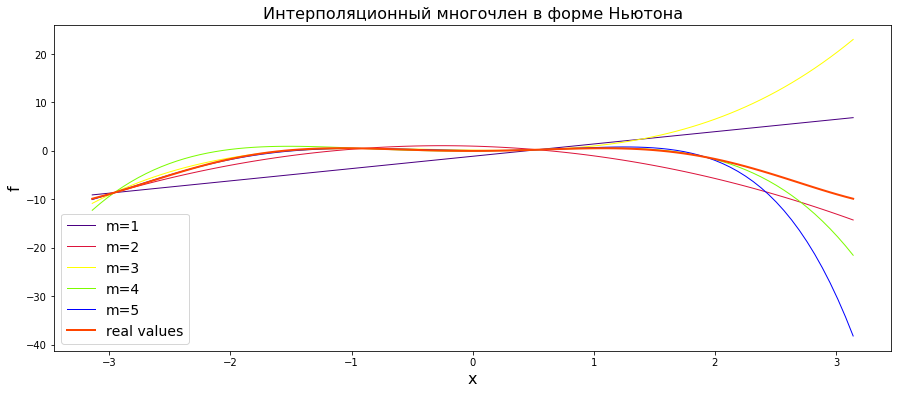

In [38]:
plt.figure(figsize=(15, 6))
plt.plot(grid, newt1, color = 'indigo', label = "m=1", linewidth = 1)
plt.plot(grid, newt2, color = 'crimson', label = "m=2", linewidth = 1)
plt.plot(grid, newt3, color = 'yellow', label = "m=3", linewidth = 1)
plt.plot(grid, newt4, color = 'lawngreen', label = "m=4", linewidth = 1)
plt.plot(grid, newt5, color = 'blue', label = "m=5", linewidth = 1)
plt.plot(grid, func(grid), color = 'orangered', label = "real values", linewidth = 2)
plt.xlabel('x', fontsize=16)
plt.ylabel('f', fontsize=16)
plt.title("Интерполяционный многочлен в форме Ньютона", fontsize=16)
plt.legend(fontsize=14)
plt.show()

**3.2**

In [39]:
def find_I(j, xx):
    res = 1
    for i in range(n):
        if(i != j):
            res *= (xx - x[i])
    for i in range(n):
        if(i != j and x[j] != x[i]):
            res /= (x[j] - x[i])
    return res

In [40]:
def lagran(x, m):
    res = 0
    for i in range(m):
        res = res + f[i] * find_I(i, x)
    return res

In [41]:
grid = np.linspace(-np.pi, np.pi, 100)
lagr1 = np.zeros(100)
lagr2 = np.zeros(100)
lagr3 = np.zeros(100)
lagr4 = np.zeros(100)
lagr5 = np.zeros(100)

In [42]:
for m in range(1, 6):
    print("m = ", m)
    print("Значение в точке 0 равно ", lagran(0, m))
    print("Значение в точке pi/2 равно ", lagran(np.pi / 2, m))
    print("Значение в точке pi равно ", lagran(np.pi, m))
    if (m==1):
        lagr1 = lagran(grid, m)
    if (m==2):
        lagr2 = lagran(grid, m)
    if (m==3):
        lagr3 = lagran(grid, m)
    if (m==4):
        lagr4 = lagran(grid, m)
    if (m==5):
        lagr5 = lagran(grid, m)

m =  1
Значение в точке 0 равно  -2.3001794604847023
Значение в точке pi/2 равно  6.307795597804754
Значение в точке pi равно  -166.22827676827032
m =  2
Значение в точке 0 равно  -2.4179716674930467
Значение в точке pi/2 равно  5.897489582522488
Значение в точке pi равно  -146.04105693189717
m =  3
Значение в точке 0 равно  -2.3099189774577766
Значение в точке pi/2 равно  6.108887546902021
Значение в точке pi равно  -154.6181413653425
m =  4
Значение в точке 0 равно  -0.06319161728685518
Значение в точке pi/2 равно  0.49177788411700973
Значение в точке pi равно  -3.868203938593524
m =  5
Значение в точке 0 равно  -0.08155368622877046
Значение в точке pi/2 равно  -0.0422090615393399
Значение в точке pi равно  -14.11176793276291


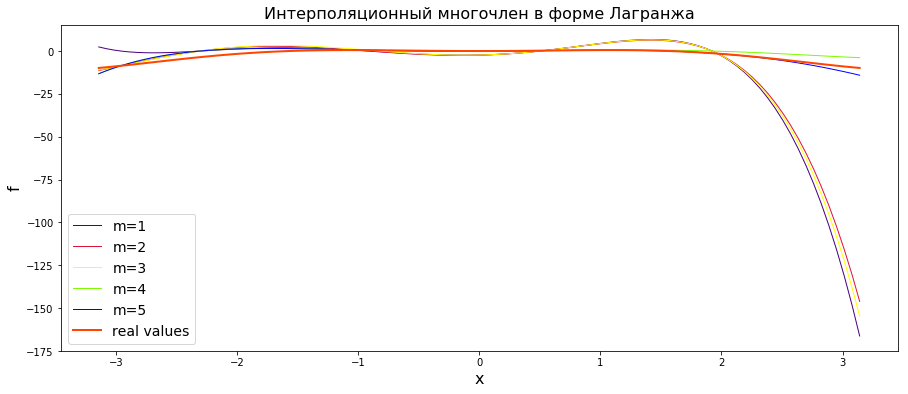

In [43]:
plt.figure(figsize=(15, 6))
plt.plot(grid, lagr1, color = 'indigo', label = "m=1", linewidth = 1)
plt.plot(grid, lagr2, color = 'crimson', label = "m=2", linewidth = 1)
plt.plot(grid, lagr3, color = 'yellow', label = "m=3", linewidth = 1)
plt.plot(grid, lagr4, color = 'lawngreen', label = "m=4", linewidth = 1)
plt.plot(grid, lagr5, color = 'blue', label = "m=5", linewidth = 1)
plt.plot(grid, func(grid), color = 'orangered', label = "real values", linewidth = 2)
plt.xlabel('x', fontsize=16)
plt.ylabel('f', fontsize=16)
plt.title("Интерполяционный многочлен в форме Лагранжа", fontsize=16)
plt.legend(fontsize=14)
plt.show()

**1.3**

In [48]:
points = [0, np.pi/2, np.pi]

for point in points:
    for m in range(1, 6):
        print("m = ", m, " точка ", point, ":")
        print("Метод Лагранжа: ", np.linalg.norm(lagran(point, m) - func(point)))
        if (m==1):
            print("Метод Ньютона: ", np.linalg.norm(newton_p1(point) - func(point)))
        if (m==2):
            print("Метод Ньютона: ", np.linalg.norm(newton_p2(point) - func(point)))
        if (m==3):
            print("Метод Ньютона: ", np.linalg.norm(newton_p3(point) - func(point)))
        if (m==4):
            print("Метод Ньютона: ", np.linalg.norm(newton_p4(point) - func(point)))
        if (m==5):
            print("Метод Ньютона: ", np.linalg.norm(newton_p5(point) - func(point)))
        print("------------------------------")

m =  1  точка  0 :
Метод Лагранжа:  2.3001794604847023
Метод Ньютона:  1.1080899741687618
------------------------------
m =  2  точка  0 :
Метод Лагранжа:  2.4179716674930467
Метод Ньютона:  0.9867633864274725
------------------------------
m =  3  точка  0 :
Метод Лагранжа:  2.3099189774577766
Метод Ньютона:  0.15651300061991702
------------------------------
m =  4  точка  0 :
Метод Лагранжа:  0.06319161728685518
Метод Ньютона:  0.03197412732692373
------------------------------
m =  5  точка  0 :
Метод Лагранжа:  0.08155368622877046
Метод Ньютона:  0.0793685024762874
------------------------------
m =  1  точка  1.5707963267948966 :
Метод Лагранжа:  6.307795597804754
Метод Ньютона:  2.8760790865950008
------------------------------
m =  2  точка  1.5707963267948966 :
Метод Лагранжа:  5.897489582522488
Метод Ньютона:  3.3588314810838775
------------------------------
m =  3  точка  1.5707963267948966 :
Метод Лагранжа:  6.108887546902021
Метод Ньютона:  3.3757773753566487
-----------

Как можно заметить, наименьшие погрешности в точке ноль (при всех m), а наибольшие - в точке $\pi$. Вероятнее всего, из-за того, что точка 0 находится в центре промежутка и около нее было сгенерировано большее число исходных точек, в то время как $\pi$ - это крайняя точка промежутка.

**3.4** Какие другие методы интерполяции Вы можете предложить?

Можно рассмотреть полиномы Чебышева, подробнее про них напишу в задаче 2 этого задания.

**3.5** 

Я возьму тут из пунктов 3.1 и 3.2 те случаи, когда m=5 (если брать все, на графике очень много будет, и уже плохо понятно, что ам нарисовано)

In [50]:
# библиотечный метод
f_real = scipy.interpolate.interp1d(x, f)

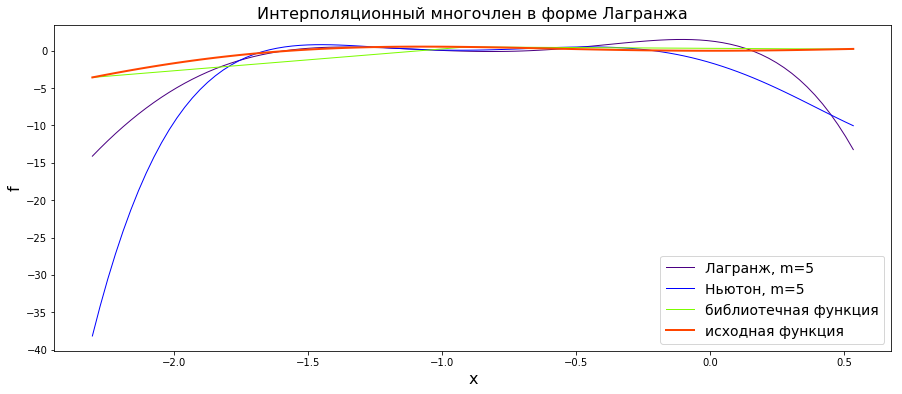

In [53]:
grid = np.linspace(x[0], x[-1], 100)
plt.figure(figsize=(15, 6))
plt.plot(grid, lagr5, color = 'indigo', label = "Лагранж, m=5", linewidth = 1)
plt.plot(grid, newt5, color = 'blue', label = "Ньютон, m=5", linewidth = 1)
plt.plot(grid, f_real(grid), color = 'lawngreen', label = "библиотечная функция", linewidth = 1)
plt.plot(grid, func(grid), color = 'orangered', label = "исходная функция", linewidth = 2)
plt.xlabel('x', fontsize=16)
plt.ylabel('f', fontsize=16)
plt.title("Интерполяционный многочлен в форме Лагранжа", fontsize=16)
plt.legend(fontsize=14)
plt.show()

Как можно заметить, наилучшее приближение дает библиотечная функция, на втором месте, видимо, Лагранж (по крайней мере, на концах), а дальше уже идет Ньютон.

Рассмотрим погрешности (отклонения от исконного значения функции):

In [55]:
points = [0, np.pi/2]

for point in points:
    print("Погрешность в точке ", point, ":")
    print("Метод Лагранжа (m=5): ", np.linalg.norm(lagran(point, 5) - func(point)))     
    print("Метод Ньютона (m=5): ", np.linalg.norm(newton_p5(point) - func(point)))
    print("Библиотечный метод: ", np.linalg.norm(f_real(point) - func(point)))
    print("------------------------------")

Погрешность в точке  0 :
Метод Лагранжа (m=5):  0.08155368622877046
Метод Ньютона (m=5):  0.0793685024762874
Библиотечный метод:  0.3227425987413981
------------------------------
Погрешность в точке  1.5707963267948966 :
Метод Лагранжа (m=5):  0.04220906153934005
Метод Ньютона (m=5):  0.4682154044596009
Библиотечный метод:  0.8914850912327623
------------------------------


<h4> Задание 2

Нам дана функция $f(x) = x^2 \cos{x}$ на отрезке $x\in [-\pi, \pi]$. Решите задачу интерполяции с помощью полиномов Чебышева степени $m$ with $m=1, 2, 3, 4, 5$. Постройте график полученного полинома вместе с исходной функцией.

2.1 Сравнить полиномы Чебышева 1-го рода различной степени 𝑚=1,2,3,4,5. Построить график на отрезке $x\in [-\pi, \pi]$.

2.2 Сравнить полиномы Чебышева 2-го рода различной степени 𝑚=1,2,3,4,5. Построить график на отрезке $x\in [-\pi, \pi]$.

2.3 Оценить погрешность метода при вычислении значения в точках с помощью полиномов  Чебышева 1-го и 2-го рода (сравнить с точным значением функции).

In [2]:
def func(x):
    res = x * x * np.cos(x)
    return res

**2.1**

In [137]:
def cheb_1r(xx, n):
    if (n == 0):
        return np.ones(xx.shape[0])
    if (n == 1):
        return xx
    if (n > 1):
        return 2 * xx * cheb_1r(xx, n-1) - cheb_1r(xx, n-2)

In [144]:
x = np.random.uniform(-np.pi, np.pi, 6)
f = func(x)
x = np.array(x)
f = np.array(f)

In [143]:
from sklearn.linear_model import LinearRegression

my_regression = LinearRegression()
my_regression.fit(np.array([cheb_1r(x, i) for i in range(0, 6)]).T, f)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
coef = my_regression.coef_
print(coef)

[ 0.          1.31618448  0.27655183 -0.1629511  -0.02744395  0.00445686]


In [76]:
# итоговое приближение многочленами Чебышева
def res_poly(xx):
    res = 0
    for i in range(6):
        res += coef[i] * cheb_1r(xx, i)
    return res

График:

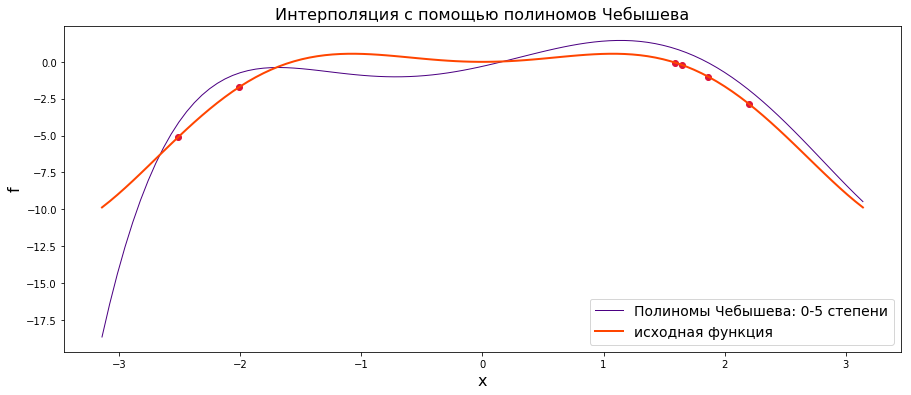

In [80]:
grid = np.linspace(-np.pi, np.pi, 100)
plt.figure(figsize=(15, 6))
plt.plot(grid, res_poly(grid), color = 'indigo', label = "Полиномы Чебышева: 0-5 степени", linewidth = 1)
plt.plot(grid, func(grid), color = 'orangered', label = "исходная функция", linewidth = 2)
plt.scatter(x, f, color = "crimson")
plt.xlabel('x', fontsize=16)
plt.ylabel('f', fontsize=16)
plt.title("Интерполяция с помощью полиномов Чебышева", fontsize=16)
plt.legend(fontsize=14)
plt.show()

На картинке выше я использовала полиномы Чебышева степени 5 (вроде получилось неплохое приближение), теперь можно сравнить полиномы степеней 1-5:

In [138]:
# итоговое приближение многочленами Чебышева
def res_poly(xx, deg, coeff):
    res = 0
    for i in range(deg+1):
        res += coeff[i] * cheb_1r(xx, i)
    return res

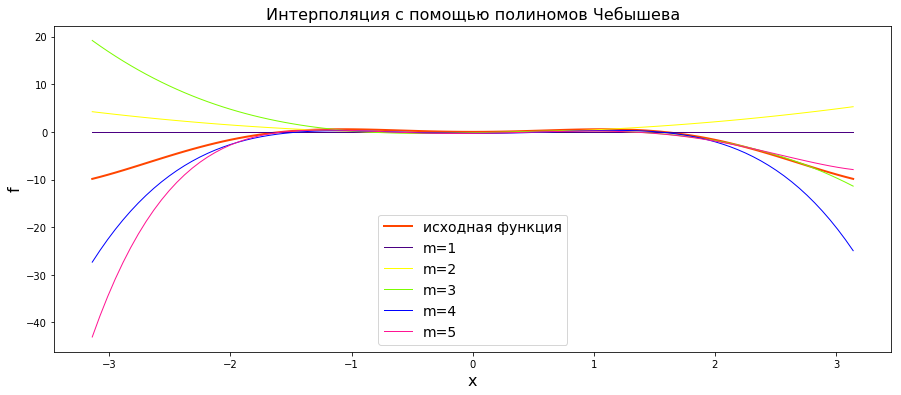

In [145]:
my_colors = ['indigo', 'yellow', 'lawngreen', 'blue', 'deeppink']
my_labels = ["m=1", "m=2", "m=3", "m=4", "m=5"]
grid = np.linspace(-np.pi, np.pi, 100)
plt.figure(figsize=(15, 6))
plt.plot(grid, func(grid), color = 'orangered', label = "исходная функция", linewidth = 2)
plt.xlabel('x', fontsize=16)
plt.ylabel('f', fontsize=16)
plt.title("Интерполяция с помощью полиномов Чебышева", fontsize=16)

for deg in range(1, 6):
    x_current = x[0:deg]
    f_current = f[0:deg]
    my_regression = LinearRegression()
    my_regression.fit(np.array([cheb_1r(x_current, i) for i in range(0, deg+1)]).T, f_current)
    coeff = my_regression.coef_
    plt.plot(grid, res_poly(grid, deg, coeff), color = my_colors[deg-1], label = my_labels[deg-1], linewidth = 1)

    
plt.legend(fontsize=14)
plt.show()

**2.2**

Полиномы Чебышева второго рода.

In [140]:
# 2 рода
def cheb_2r(xx, n):
    if (n == 0):
        return np.ones(xx.shape[0])
    if (n == 1):
        return 2*xx
    if (n > 1):
        return 2 * xx * cheb_2r(xx, n-1) - cheb_2r(xx, n-2)

In [141]:
# итоговое приближение многочленами Чебышева 2 рода
def res_poly2(xx, deg, coeff):
    res = 0
    for i in range(deg+1):
        res += coeff[i] * cheb_2r(xx, i)
    return res 

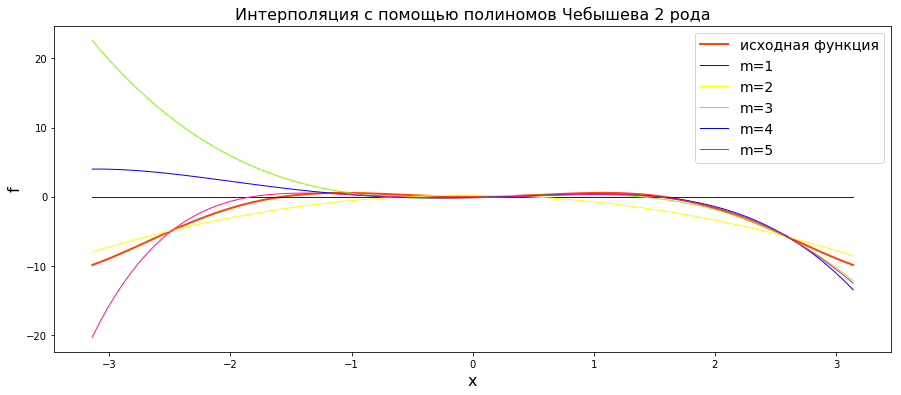

In [142]:
my_colors = ['indigo', 'yellow', 'lawngreen', 'blue', 'deeppink']
my_labels = ["m=1", "m=2", "m=3", "m=4", "m=5"]
grid = np.linspace(-np.pi, np.pi, 100)
plt.figure(figsize=(15, 6))
plt.plot(grid, func(grid), color = 'orangered', label = "исходная функция", linewidth = 2)
plt.xlabel('x', fontsize=16)
plt.ylabel('f', fontsize=16)
plt.title("Интерполяция с помощью полиномов Чебышева 2 рода", fontsize=16)

for deg in range(1, 6):
    x_current = x[0:deg]
    f_current = f[0:deg]
    my_regression = LinearRegression()
    my_regression.fit(np.array([cheb_2r(x_current, i) for i in range(0, deg+1)]).T, f_current)
    coeff = my_regression.coef_
    plt.plot(grid, res_poly2(grid, deg, coeff), color = my_colors[deg-1], label = my_labels[deg-1], linewidth = 1)

    
plt.legend(fontsize=14)
plt.show()

И снова можно заметить, что в середине интервала приближение гораздо лучше, чем на концах.

**2.3**

Оценить погрешность метода при вычислении значения в точках с помощью полиномов Чебышева 1-го и 2-го рода (сравнить с точным значением функции).

In [146]:
print("Полиномы Чебышева 1-го рода: ")
for deg in range(1, 6):
    x_current = x[0:deg]
    f_current = f[0:deg]
    my_regression = LinearRegression()
    my_regression.fit(np.array([cheb_1r(x_current, i) for i in range(0, deg+1)]).T, f_current)
    coeff = my_regression.coef_
    print("Степень полинома = ", deg)
    print("Погрешность в точке 0: ", np.linalg.norm(res_poly(np.array([0]), deg, coeff) - func(0)))
    print("Погрешность в точке pi/2: ", np.linalg.norm(res_poly(np.array([np.pi / 2]), deg, coeff) - func(np.pi / 2)))
    print("Погрешность в точке pi: ", np.linalg.norm(res_poly(np.array([np.pi]), deg, coeff) - func(np.pi)))
    print("-------------------------------")

Полиномы Чебышева 1-го рода: 
Степень полинома =  1
Погрешность в точке 0:  0.0
Погрешность в точке pi/2:  1.510847429830589e-16
Погрешность в точке pi:  9.869604401089358
-------------------------------
Степень полинома =  2
Погрешность в точке 0:  0.25381532396656165
Погрешность в точке pi/2:  1.2605358953840702
Погрешность в точке pi:  15.149548354308358
-------------------------------
Степень полинома =  3
Погрешность в точке 0:  0.20799628298362782
Погрешность в точке pi/2:  0.44058285435271854
Погрешность в точке pi:  1.517525298005184
-------------------------------
Степень полинома =  4
Погрешность в точке 0:  0.3292448182031213
Погрешность в точке pi/2:  0.0985772716023378
Погрешность в точке pi:  15.06677544906606
-------------------------------
Степень полинома =  5
Погрешность в точке 0:  0.3110923256031284
Погрешность в точке pi/2:  0.4757969804565985
Погрешность в точке pi:  1.9506740635621647
-------------------------------


In [129]:
print("Полиномы Чебышева 2-го рода: ")
for deg in range(1, 6):
    x_current = x[0:deg]
    f_current = f[0:deg]
    my_regression = LinearRegression()
    my_regression.fit(np.array([cheb_2r(x_current, i) for i in range(0, deg+1)]).T, f_current)
    coeff = my_regression.coef_
    print("Степень полинома = ", deg)
    print("Погрешность в точке 0: ", np.linalg.norm(res_poly2(np.array([0]), deg, coeff) - func(0)))
    print("Погрешность в точке pi/2: ", np.linalg.norm(res_poly2(np.array([np.pi / 2]), deg, coeff) - func(np.pi / 2)))
    print("Погрешность в точке pi: ", np.linalg.norm(res_poly2(np.array([np.pi]), deg, coeff) - func(np.pi)))
    print("-------------------------------")

Полиномы Чебышева 2-го рода: 
Степень полинома =  1
Погрешность в точке 0:  0.0
Погрешность в точке pi/2:  1.510847429830589e-16
Погрешность в точке pi:  9.869604401089358
-------------------------------
Степень полинома =  2
Погрешность в точке 0:  0.2144915903990723
Погрешность в точке pi/2:  2.0352628228686878
Погрешность в точке pi:  1.3506928757542305
-------------------------------
Степень полинома =  3
Погрешность в точке 0:  0.13523598156242977
Погрешность в точке pi/2:  0.37522249301838667
Погрешность в точке pi:  2.300459769143931
-------------------------------
Степень полинома =  4
Погрешность в точке 0:  0.12196009333960005
Погрешность в точке pi/2:  0.08355917934693068
Погрешность в точке pi:  3.5833655155332274
-------------------------------
Степень полинома =  5
Погрешность в точке 0:  0.14962907115678448
Погрешность в точке pi/2:  0.11799182186143851
Погрешность в точке pi:  2.638862616988064
-------------------------------


Точки, где смотрела различие (погрешность) выбрала такие же, как в первом задании: действительно, это середина интервала, один из его концов и точка между серединой и концом.

Как можно заметить, на краевых точках интервала погрешность снова довольно большая. 

<h4> Задание 3

Построить систему полиномов Чебышева 1-го и 2-го рода (до n=10).

In [50]:
# 1 рода
def cheb_1r(xx, n):
    if (n == 0):
        return 1
    if (n == 1):
        return xx
    if (n > 1):
        return 2 * xx * cheb_1r(xx, n-1) - cheb_1r(xx, n-2)
    
# 2 рода
def cheb_2r(xx, n):
    if (n == 0):
        return 1
    if (n == 1):
        return 2*xx
    if (n > 1):
        return 2 * xx * cheb_2r(xx, n-1) - cheb_2r(xx, n-2)

In [51]:
grid = np.linspace(-1, 1, 100)

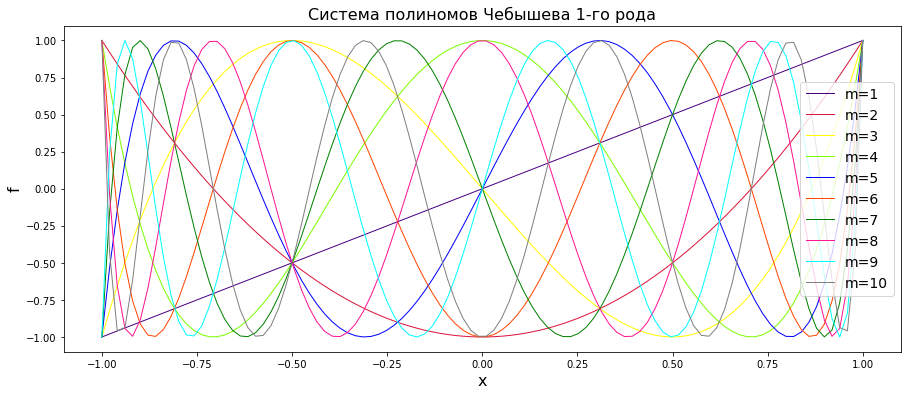

In [52]:
plt.figure(figsize=(15, 6))
plt.plot(grid, cheb_1r(grid, 1), color = 'indigo', label = "m=1", linewidth = 1)
plt.plot(grid, cheb_1r(grid, 2), color = 'crimson', label = "m=2", linewidth = 1)
plt.plot(grid, cheb_1r(grid, 3), color = 'yellow', label = "m=3", linewidth = 1)
plt.plot(grid, cheb_1r(grid, 4), color = 'lawngreen', label = "m=4", linewidth = 1)
plt.plot(grid, cheb_1r(grid, 5), color = 'blue', label = "m=5", linewidth = 1)
plt.plot(grid, cheb_1r(grid, 6), color = 'orangered', label = "m=6", linewidth = 1)
plt.plot(grid, cheb_1r(grid, 7), color = 'green', label = "m=7", linewidth = 1)
plt.plot(grid, cheb_1r(grid, 8), color = 'deeppink', label = "m=8", linewidth = 1)
plt.plot(grid, cheb_1r(grid, 9), color = 'cyan', label = "m=9", linewidth = 1)
plt.plot(grid, cheb_1r(grid, 10), color = 'grey', label = "m=10", linewidth = 1)
plt.xlabel('x', fontsize=16)
plt.ylabel('f', fontsize=16)
plt.title("Система полиномов Чебышева 1-го рода", fontsize=16)
plt.legend(fontsize=14)
plt.show()

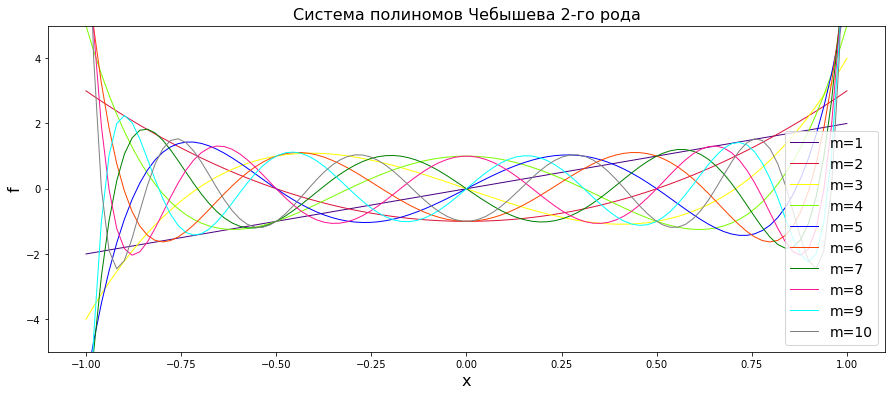

In [53]:
plt.figure(figsize=(15, 6))
plt.plot(grid, cheb_2r(grid, 1), color = 'indigo', label = "m=1", linewidth = 1)
plt.plot(grid, cheb_2r(grid, 2), color = 'crimson', label = "m=2", linewidth = 1)
plt.plot(grid, cheb_2r(grid, 3), color = 'yellow', label = "m=3", linewidth = 1)
plt.plot(grid, cheb_2r(grid, 4), color = 'lawngreen', label = "m=4", linewidth = 1)
plt.plot(grid, cheb_2r(grid, 5), color = 'blue', label = "m=5", linewidth = 1)
plt.plot(grid, cheb_2r(grid, 6), color = 'orangered', label = "m=6", linewidth = 1)
plt.plot(grid, cheb_2r(grid, 7), color = 'green', label = "m=7", linewidth = 1)
plt.plot(grid, cheb_2r(grid, 8), color = 'deeppink', label = "m=8", linewidth = 1)
plt.plot(grid, cheb_2r(grid, 9), color = 'cyan', label = "m=9", linewidth = 1)
plt.plot(grid, cheb_2r(grid, 10), color = 'grey', label = "m=10", linewidth = 1)
plt.xlabel('x', fontsize=16)
plt.ylabel('f', fontsize=16)
plt.ylim(-5, 5)
plt.title("Система полиномов Чебышева 2-го рода", fontsize=16)
plt.legend(fontsize=14)
plt.show()